Question 1

In [7]:
from sklearn import datasets

iris = datasets.load_iris()
iris.data

y = iris.target

In [8]:
import numpy as np

#New features: sepal area (sepal length*sepal width), petal area (petal length*petal width)
iris_data = iris.data

sepal_area = iris_data[:, 0] * iris_data[:, 1]
petal_area = iris_data[:, 2] * iris_data[:, 3]

X = np.column_stack((sepal_area, petal_area))

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(
    X,y,
    test_size=0.40,
    train_size=0.60,
    random_state=123,
    shuffle=True,
    stratify=y)

In [10]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)

preds = clf.predict(X_test)
print(preds)

print('actual iris species')
print(y_test)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,clf.predict(X_test) )
print('accuracy score :', acc)

[1 1 1 1 0 2 1 0 0 2 0 2 2 2 2 0 1 2 0 2 2 0 1 0 0 2 1 0 0 0 0 0 1 2 0 1 1
 2 0 1 0 2 2 2 0 2 2 1 0 0 1 1 2 1 2 1 1 2 1 2]
actual iris species
[1 1 1 1 0 1 2 0 0 2 0 2 2 1 2 0 1 2 0 2 2 0 1 0 0 2 1 0 0 0 0 0 1 2 0 1 1
 2 0 1 0 2 2 2 0 2 2 1 0 0 1 1 2 1 2 1 1 2 1 2]
accuracy score : 0.95


Question 2


In [11]:
import numpy as np
from collections import Counter
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the MNIST digits dataset
digits = load_digits()

#isolate only the even digits and their corresponding target values
data = digits.data[digits.target % 2 == 0]
even_values = digits.target[digits.target % 2 == 0]

#add target column
df = pd.DataFrame(data)
df['target'] = even_values
display(df)
X = df.to_numpy()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
2,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
3,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0,6
4,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,0.0,5.0,12.0,8.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,12.0,12.0,3.0,0.0,0.0,8
887,0.0,0.0,0.0,3.0,15.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,16.0,4.0,0.0,0.0,4
888,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
889,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8


In [12]:
y = df['target'].to_numpy()
y



array([0, 2, 4, 6, 8, 0, 2, 4, 6, 8, 0, 2, 4, 6, 8, 0, 6, 0, 8, 8, 4, 0,
       0, 2, 2, 8, 2, 0, 2, 6, 4, 6, 6, 6, 4, 0, 2, 8, 2, 0, 0, 6, 2, 4,
       6, 6, 8, 4, 4, 0, 6, 6, 4, 4, 2, 8, 2, 2, 4, 8, 8, 4, 0, 8, 8, 0,
       2, 4, 6, 8, 0, 2, 4, 6, 8, 0, 2, 4, 6, 8, 0, 6, 0, 8, 8, 4, 0, 0,
       2, 2, 8, 2, 0, 2, 6, 4, 6, 6, 6, 4, 0, 2, 8, 2, 0, 0, 6, 2, 6, 8,
       4, 4, 0, 6, 6, 4, 4, 2, 8, 2, 2, 4, 8, 8, 4, 0, 8, 8, 0, 2, 4, 6,
       8, 0, 2, 4, 6, 8, 0, 2, 4, 6, 8, 0, 6, 0, 8, 8, 4, 0, 0, 2, 2, 8,
       2, 0, 2, 6, 4, 6, 6, 6, 4, 0, 2, 8, 2, 0, 0, 6, 2, 4, 6, 6, 8, 4,
       4, 0, 6, 6, 4, 4, 2, 8, 2, 2, 4, 8, 8, 4, 0, 8, 0, 2, 4, 6, 8, 0,
       2, 4, 6, 8, 0, 2, 4, 6, 8, 0, 6, 0, 8, 8, 4, 0, 0, 2, 2, 8, 2, 0,
       2, 6, 4, 6, 6, 6, 4, 0, 2, 8, 2, 0, 0, 6, 2, 4, 6, 6, 8, 4, 4, 0,
       6, 6, 4, 4, 2, 8, 2, 2, 4, 8, 8, 4, 0, 8, 8, 0, 2, 4, 6, 8, 0, 2,
       4, 6, 8, 0, 2, 4, 6, 8, 0, 6, 0, 8, 8, 4, 0, 0, 2, 2, 8, 2, 0, 2,
       6, 4, 6, 6, 6, 4, 0, 2, 8, 2, 0, 0, 6, 2, 4,

In [13]:
X_train, X_test, y_train, y_test=train_test_split(
    X,y,
    test_size=0.30,
    random_state=123,
    shuffle=True,
    stratify=y)
print('X_train shape :', X_train.shape)
print('X_test shape :', X_test.shape)
print('y_train shape :', y_train.shape)
print('y_test shape :', y_test.shape)

X_train shape : (623, 65)
X_test shape : (268, 65)
y_train shape : (623,)
y_test shape : (268,)


preds: [0 8 0 2 0 6 8 4 8 6 4 6 6 2 6 6 8 2 4 8 0 8 2 6 8 2 0 0 4 0 8 6 0 4 6 0 6
 6 8 6 4 8 6 0 2 6 8 8 0 2 6 4 4 0 2 4 6 0 4 0 4 8 0 0 6 2 2 8 4 0 4 4 2 2
 6 2 6 8 6 2 2 2 4 6 6 8 6 2 8 2 2 0 8 6 2 0 8 0 6 6 4 8 2 4 2 0 0 6 4 0 8
 4 2 2 0 6 6 4 4 6 4 8 0 8 8 0 8 6 6 8 0 4 2 0 2 4 6 0 0 2 4 2 2 6 2 4 2 0
 2 2 8 8 4 6 0 4 4 6 2 4 8 4 4 4 0 6 0 6 4 0 0 0 4 2 8 0 6 0 2 8 0 6 2 6 0
 2 8 6 0 0 0 6 4 4 2 8 6 4 8 0 4 4 4 8 4 8 2 2 2 2 8 8 4 0 0 2 6 4 4 2 4 8
 0 4 0 0 2 0 4 8 8 0 6 6 2 8 4 6 8 2 8 2 4 4 8 8 8 8 2 2 4 8 0 2 6 4 4 6 4
 6 6 8 0 6 6 2 6 8]
actual: [0 8 0 2 0 6 8 4 8 6 4 6 6 2 6 6 8 2 4 8 0 8 2 6 8 2 0 0 4 0 8 6 0 4 6 0 6
 6 8 6 4 8 6 0 2 6 8 8 0 2 6 4 4 0 2 4 6 0 4 0 4 8 0 0 6 2 2 8 4 0 4 4 2 2
 6 2 6 8 6 2 2 2 4 6 6 8 6 2 8 2 2 0 8 6 2 0 8 0 6 6 4 8 2 4 2 0 0 6 4 0 8
 4 2 2 0 6 6 4 4 6 4 8 0 8 8 0 8 8 6 8 0 4 2 0 2 4 6 0 0 2 4 2 2 6 2 4 2 0
 2 2 8 8 4 6 0 4 4 6 2 4 8 4 4 4 0 6 0 6 4 0 0 0 4 2 8 0 6 0 2 8 0 6 2 6 0
 2 8 6 0 0 0 6 4 4 2 8 6 4 8 0 4 4 4 8 4 8 2 2 2 2 8 8 4 0 0 2 6 

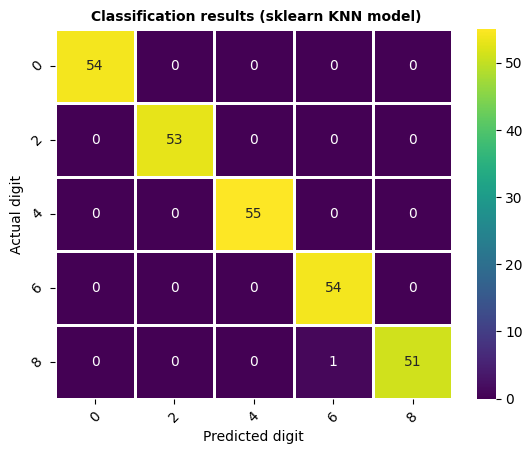

In [14]:
from sklearn.neighbors import KNeighborsClassifier
skmodel = KNeighborsClassifier(n_neighbors=3)
skmodel.fit(X_train,y_train)
print('preds:', skmodel.predict(X_test))
print('actual:', y_test)
cm_sk = confusion_matrix(y_test, skmodel.predict(X_test))
ax = sns.heatmap(cm_sk,linewidths=2, annot=True, cmap='viridis', cbar=True);

even_digit_names = [digits.target_names[i] for i in range(0, 10, 2)]
ax.set_xticklabels(even_digit_names);
ax.set_yticklabels(even_digit_names);
plt.xlabel('Predicted digit');
plt.ylabel('Actual digit');
plt.xticks(rotation=45);
plt.yticks(rotation=45);
plt.title(' Classification results (sklearn KNN model)', fontsize='medium', fontweight='bold');
print(classification_report(y_test, skmodel.predict(X_test)))

Question 3

In [15]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

data = load_iris() #shift+tab

df = pd.DataFrame()

df['sepal length'] = data['data'][:,0]
df['sepal width'] = data['data'][:,1]
df['petal length'] = data['data'][:,2]
df['petal width'] = data['data'][:,3]

#removing first column (sepal length) to use only 3 features
df = df.drop(columns=['sepal length'])

display(df)

,sepal width,petal length,petal width
0,3.5,1.4,0.2
1,3.0,1.4,0.2
2,3.2,1.3,0.2
3,3.1,1.5,0.2
4,3.6,1.4,0.2
...,...,...,...
145,3.0,5.2,2.3
146,2.5,5.0,1.9
147,3.0,5.2,2.0
148,3.4,5.4,2.3


In [17]:
X = df.to_numpy() # These are our features
df['target'] = data['target']
named_targets = []

for elm in df['target'].to_list():
    named_targets.append(data.target_names[elm])

df['species_name'] = named_targets

In [18]:
y = df['target'].to_numpy()

X_train, X_test, y_train, y_test, idx_train, idx_test=train_test_split(
    X,y, range(X.shape[0]),
    test_size=0.30,
    train_size=0.70,
    random_state=123,
    shuffle=True,
    stratify=y)

print('X_train shape :', X_train.shape)
print('X_test shape :', X_test.shape)
print('y_train shape :', y_train.shape)
print('y_test shape :', y_test.shape)

X_train shape : (105, 3)
X_test shape : (45, 3)
y_train shape : (105,)
y_test shape : (45,)


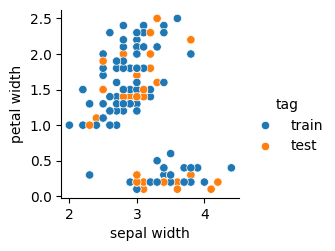

In [19]:
tag = []

for _ in range(X.shape[0]):
    if _ in idx_train:
        tag.append('train')
    else:
        tag.append('test')

df['tag'] = tag

sns.pairplot(df.drop(labels=['target'],axis=1), x_vars=['sepal width'],
    y_vars=['petal width'], hue='tag')

In [33]:
class KMeans:
    def __init__(self, k):
        self.k = k
        self.cluster_labels = None
        self.centroids = None

    def fit(self, X):
        # initial centroid points wont be random, it will be first k points
        self.centroids = X[:self.k, :].copy()

        self.cluster_labels = np.arange(self.k)
        while True:
            distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in self.centroids])
            self.clusters = np.argmin(distances, axis=0)
            new_centroids = np.array([X[self.clusters == i, :].mean(axis=0) for i in range(self.k)])
            # check convergence
            if np.array_equal(new_centroids, self.centroids):
                break
            else:
                self.centroids = new_centroids

    def predict(self, X):
        distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in self.centroids])
        return self.cluster_labels[np.argmin(distances, axis=0)]

In [23]:
model = KMeans(k=3)
model.fit(X_train)
kmeans_labels = model.predict(X_test)
cluster_coords = model.centroids
print('predicted_labels:', kmeans_labels)
print('cluster centroids:', cluster_coords)

predicted_labels: [2 1 2 2 1 0 0 2 0 0 1 0 1 0 2 0 1 1 0 0 0 0 0 2 0 2 1 0 2 1 1 1 1 2 2 2 1
 1 1 0 1 2 2 1 2]
cluster centroids: [[3.43428571 1.48857143 0.26571429]
 [2.96764706 5.52352941 2.01470588]
 [2.72777778 4.23333333 1.30833333]]


In [25]:
df['kmeans_labels'] = model.predict(X)


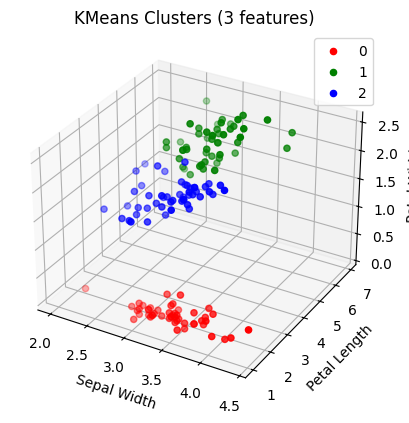

In [32]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = ['red', 'green', 'blue']

for label, color in zip(model.cluster_labels, colors):
    ax.scatter(df.loc[df['kmeans_labels'] == label, 'sepal width'],
               df.loc[df['kmeans_labels'] == label, 'petal length'],
               df.loc[df['kmeans_labels'] == label, 'petal width'],
               color=color,
               label=f'{label}')

ax.set_xlabel('Sepal Width')
ax.set_ylabel('Petal Length')
ax.set_zlabel('Petal Width')
ax.set_title('KMeans Clusters (3 features)')
ax.legend()
plt.show()

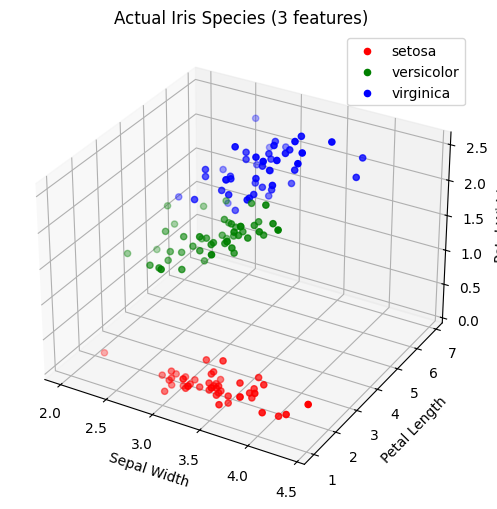

In [34]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

colors = ['red', 'green', 'blue']

for name, label, color in zip(data.target_names, [0, 1, 2], colors):
    ax.scatter(df.loc[df['target'] == label, 'sepal width'],
               df.loc[df['target'] == label, 'petal length'],
               df.loc[df['target'] == label, 'petal width'],
               color=color,
               label=name)

ax.set_xlabel('Sepal Width')
ax.set_ylabel('Petal Length')
ax.set_zlabel('Petal Width')
ax.set_title('Actual Iris Species (3 features)')
ax.legend()
plt.show()